In [11]:
## Standard libraries
import os
import math
import numpy as np 
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Set Seaborn style
sns.set(style='darkgrid', font_scale=1.2)
from sklearn.datasets import make_moons

## Progress bar
from tqdm.notebook import tqdm

import torch
print("Using torch", torch.__version__)
#torch.manual_seed(42) # Setting the seed
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.distributions.multivariate_normal import MultivariateNormal

from torch.utils.tensorboard import SummaryWriter
import torch.profiler

Using torch 2.1.0


In [12]:
class langevin_sampler():
    def __init__(self, sampling_steps, variance, device):
        self.device = device
        self.K = torch.tensor(sampling_steps, device=self.device)
        self.s = torch.tensor(variance, device=self.device)
    
    def get_sample(self, initial_sample, grad_log_fcn):
        x_k = initial_sample
        sample = torch.zeros(self.K, device=self.device)
        step=0
        while step < self.K:
            # Compute gradient
            grad = grad_log_fcn.get(x_k)
            
            # Update sample
            x_k = x_k + self.s * grad + (torch.sqrt(2*self.s)*torch.randn(1, device=self.device))  
            sample[step] = x_k.item()
            step += 1             
        
        return x_k.item(), sample.numpy()

In [13]:
class grad_log_standard_normal():
    def __init__(self):
        pass

    def get(self, x):
        return -x

  0%|          | 0/1000 [00:00<?, ?it/s]

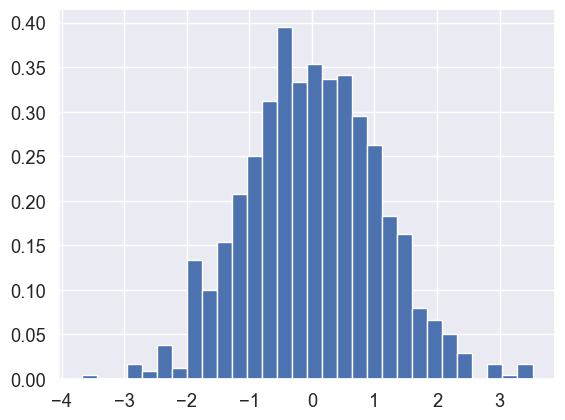

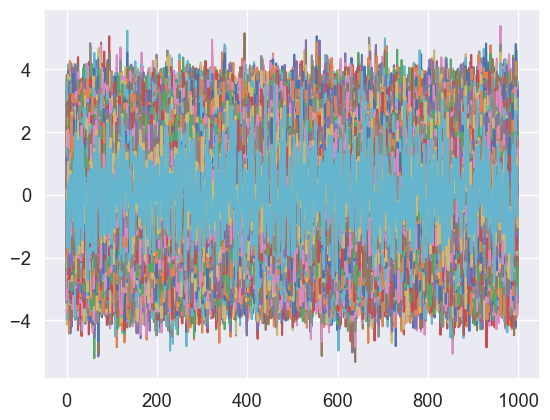

In [14]:
device = torch.device('cpu')
sampler = langevin_sampler(10000, 0.1, device)
grad_log_fcn = grad_log_standard_normal()

initial_sample = torch.randn(1, device=device)
x, samples = list(zip(*[sampler.get_sample(initial_sample, grad_log_fcn) for _ in tqdm(range(1000))]))


plt.hist(x, bins=30, density=True)
plt.show()

plt.plot(samples)
plt.show()

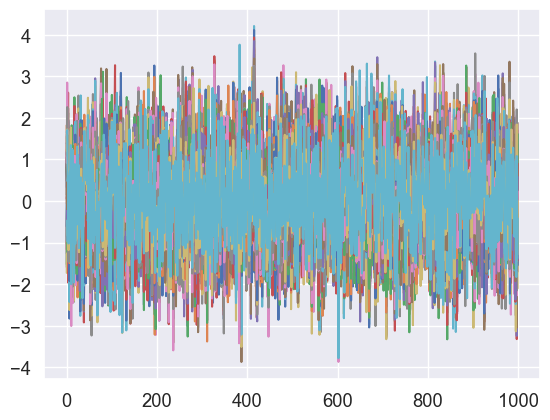

In [15]:
plt.plot([v[:50] for v in samples])
plt.show()

In [16]:
print([v[-5:] for v in samples[:10]])


[array([-0.49666303,  0.16079769, -0.0130164 ,  0.09811906, -0.18567383],
      dtype=float32), array([-0.55715865, -1.2909472 , -1.3170773 , -1.0365463 , -1.6850941 ],
      dtype=float32), array([-0.47011867, -0.7733933 , -1.3133652 , -0.8903729 , -0.65319264],
      dtype=float32), array([ 1.4490123 ,  2.0666747 ,  1.4560131 ,  1.0452191 , -0.12624341],
      dtype=float32), array([-0.4559189 , -0.04365093, -0.15037459,  0.61167544,  0.3418393 ],
      dtype=float32), array([-0.03145522, -0.3211697 , -1.4475839 , -0.9176637 , -1.1973858 ],
      dtype=float32), array([0.60165465, 1.3137832 , 0.68180186, 0.7047848 , 0.44623917],
      dtype=float32), array([-0.72705525, -0.28622478, -1.3467073 , -1.5842513 , -1.8610184 ],
      dtype=float32), array([-0.29942358,  0.20735943,  0.9749931 ,  0.7490609 ,  0.61703557],
      dtype=float32), array([ 0.01237592, -0.6068892 , -0.19759828,  0.28425953, -0.33462524],
      dtype=float32)]
